# DBSCAN - Example With Outlier Detection
This example was discussed during the lecture. You can find its description on slides 31-34 of presentation about Clustering.


## 1 Data Loading And Standardization


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib

matplotlib.rc('font', size=12)
matplotlib.rc('axes', titlesize=12)

""" Outlier detection with DBCSAN clustering using scikit-learn
example gas turbine emissions """

# Data loading
X = pd.read_csv("gas_emission.csv", sep=";")

# Standardize data
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

## 2 Manual Gridsearch 

* Generate the combinations of hyperparameters epsilon and kmin manually using "numpy.meshgrid" and two for-loops
* Build a DBSCAN algorithm for each combination
* compute the number of outliers and show the number of clusters


In [3]:
# Generate an array of combinations for hyperparameters epsilon and kmin
eps = np.arange(1, 3, 0.5)
kmin = np.arange(2, 7, 2)
EPS, KMIN = np.meshgrid(eps, kmin)
outlier = np.zeros(EPS.shape)
cluster_numbers = np.zeros(EPS.shape)   



# Gridsearch For-Loops
for m in range(eps.shape[0]):
    for n in range(kmin.shape[0]):
        db = DBSCAN(min_samples=KMIN[n, m], eps=EPS[n, m], metric='euclidean').fit(X_standard)
        labels = db.labels_
        outlier[n, m] = list(labels).count(-1)
        cluster_numbers[n, m] = len(set(labels)) - (1 if -1 in labels else 0)

### 2.1 Visualisation of the Gridsearch results

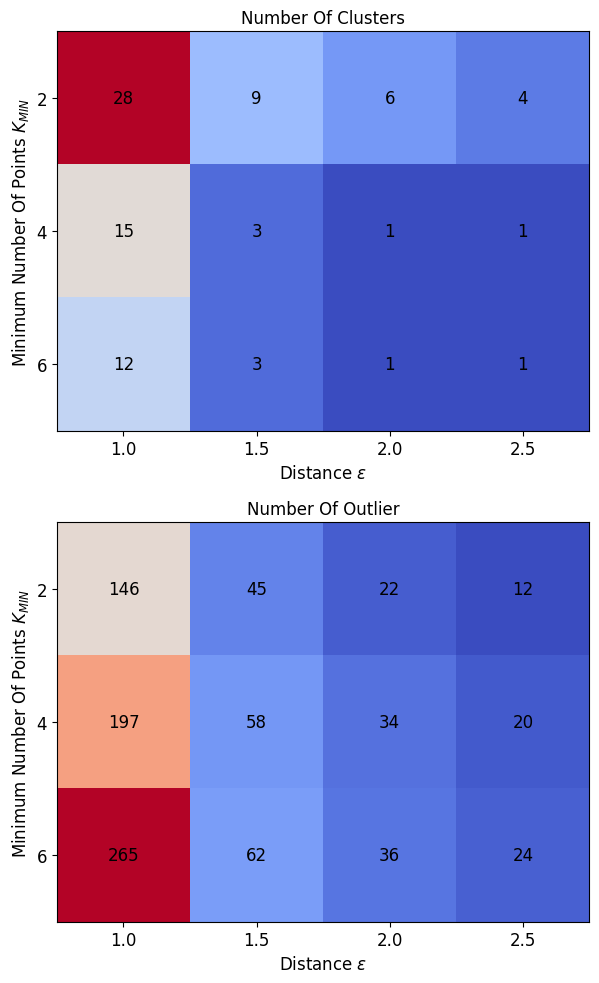

In [4]:
# Heatmaps for outliers and number of clusters
[ax2, ax1] = plt.figure(1, figsize=(7, 10)).subplots(2, 1)
ax1.imshow(outlier, cmap='coolwarm')
ax1.set_xticks(np.arange(len(eps)))
ax1.set_yticks(np.arange(len(kmin)))
ax1.set_xticklabels(eps)
ax1.set_yticklabels(kmin)
for m in range(eps.shape[0]):
    for n in range(kmin.shape[0]):
        text = ax1.text(m, n, int(outlier[n, m]),
                        ha='center', va='center', color='k')
ax1.set_title(r'Number Of Outlier')
ax1.set_xlabel(r'Distance $\epsilon$')
ax1.set_ylabel(r'Minimum Number Of Points $K_{MIN}$')

ax2.imshow(cluster_numbers, cmap='coolwarm')
ax2.set_xticks(np.arange(len(eps)))
ax2.set_yticks(np.arange(len(kmin)))
ax2.set_xticklabels(eps)
ax2.set_yticklabels(kmin)
for m in range(eps.shape[0]):
    for n in range(kmin.shape[0]):
        text = ax2.text(m, n, int(cluster_numbers[n, m]),
                        ha='center', va='center', color='k')
ax2.set_title(r'Number Of Clusters')
ax2.set_xlabel(r'Distance $\epsilon$')
ax2.set_ylabel(r'Minimum Number Of Points $K_{MIN}$')
plt.tight_layout()


## 3. DBSCAN And Outlier Visualisation
* For an environment with $\epsilon$ = 2 and $\epsilon$ = 2.5 as well as KMIN = 4 or KMIN = 6 a cluster number one is obtained
* Depending on the parameterization between 20 and 36 outliers
* Representation of the operating points for the parameter combination and  = 2.5 and KMIN = 4, outliers are highlighted in color
* Outliers are mainly due to increased carbon monoxide emissions, only a few outliers with increased nitrogen oxide emissions
* Appropriate operation management should avoid the strongly increased carbon monoxide emissions



The outliers have indices of [18, 36, 141, 142, 187, 625, 856, 1008, 1362, 1363, 1584, 1778, 1788, 1795, 1797, 1811, 1815, 1821, 2254, 3614, 3615, 3976, 3977, 4761, 5002, 5751, 5752, 6107, 6202, 6333, 6365, 6900, 6915, 6916, 7320, 7383]


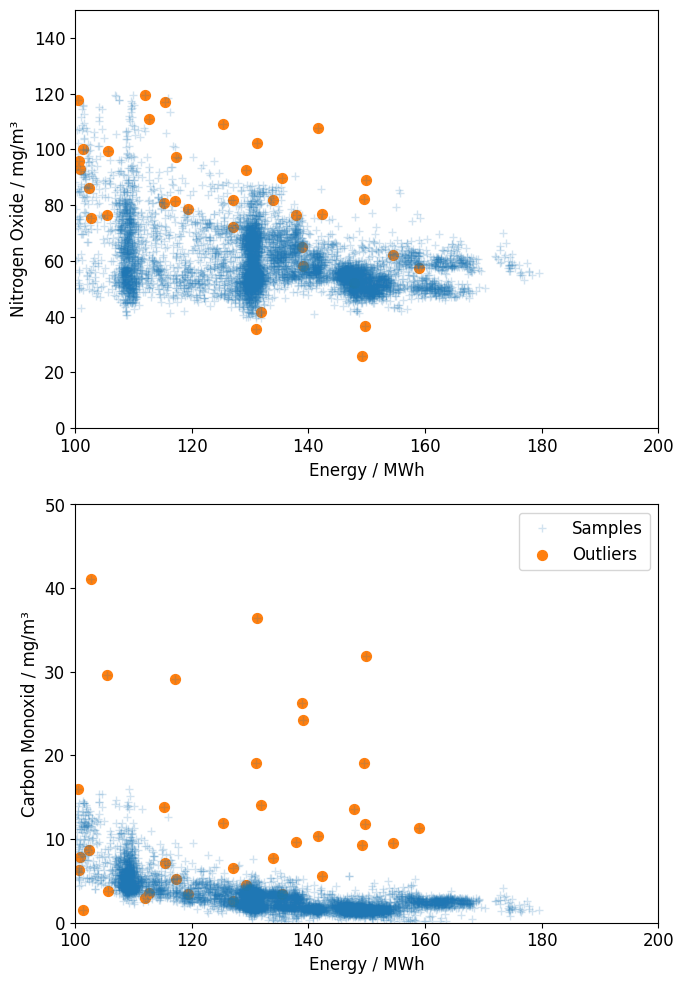

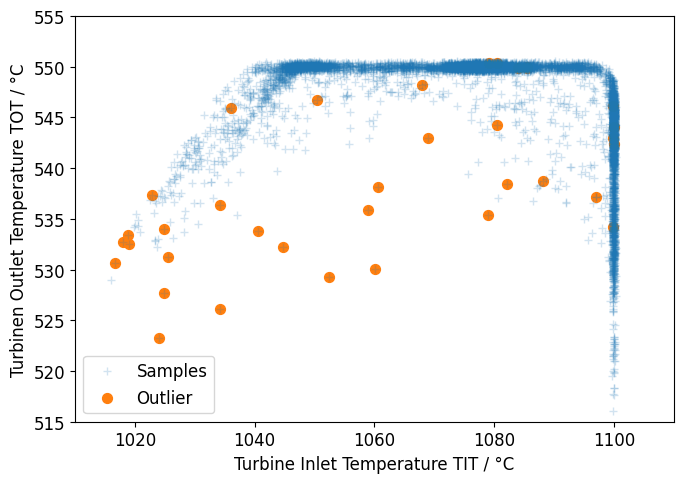

In [10]:
#DBSCAN for optimized parameters

db = DBSCAN(min_samples=6, eps=2, metric='euclidean').fit(X_standard)

X['cluster'] = db.labels_
outlier_index = X[X['cluster'] ==-1].index.tolist()

print(f'The outliers have indices of {outlier_index}')

## Visualize target variables CO and NOx as a function of energy yield
ax1, ax2 = plt.figure(2, figsize=(7, 10)).subplots(2, 1)
ax1.plot(X.TEY, X.NOX, '+', alpha=0.2)
ax1.scatter(X[X.cluster == -1].TEY, X[X.cluster == -1].NOX, s=50, c='C1')
ax1.axis([100, 200, 0, 150])
ax1.set_xlabel(r'Energy / MWh')
ax1.set_ylabel('Nitrogen Oxide / mg/m³')
ax2.plot(X.TEY, X.CO, '+', label='Samples', alpha=0.2)
ax2.scatter(X[X.cluster == -1].TEY, X[X.cluster == -1].CO,
            s=50, c='C1', label='Outliers')
ax2.axis([100, 200, 0, 50])
ax2.set_xlabel(r'Energy / MWh')
ax2.set_ylabel('Carbon Monoxid / mg/m³')
ax2.legend()
plt.tight_layout()

# Visualize target variables CO and NOx as a function of energy yield
ax1 = plt.figure(3, figsize=(7, 5)).subplots(1, 1)
ax1.plot(X.TIT, X.TAT, '+', label='Samples', alpha=0.2)
ax1.scatter(X[X.cluster == -1].TIT, X[X.cluster == -1].TAT, s=50,
            c='C1', label='Outlier')
ax1.axis([1010, 1110, 515, 555])
ax1.set_xlabel(r'Turbine Inlet Temperature TIT / °C')
ax1.set_ylabel('Turbinen Outlet Temperature TOT / °C')
ax1.legend(loc=3)
plt.tight_layout()

### Choosing the range of epsilon:


Below is the calculation of the distances for all combinations of points and the dermination of the distance that has 2% relative frequancy.
<br>
* 2 % of the parts have a distance of 1.8 or less in this example
* Parameter selected slightly above this range. The range from 1 to 2.5 is explored and the results of epsilon=2 are shown above.



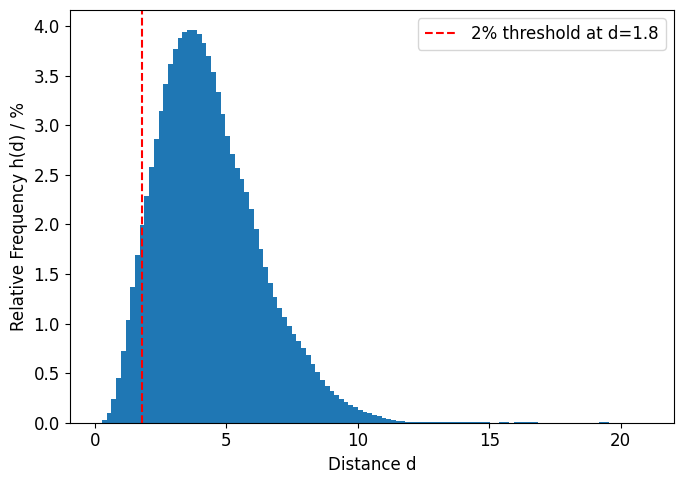

In [5]:
# Distances for all combinations of points
diff = (X_standard[np.newaxis, :, :] - X_standard[:, np.newaxis, :])

dist = pd.Series(np.sqrt((diff**2).sum(axis=2)).reshape(-1))

# Define the classes and calculate relative frequencies. 1.8 represents the resultion that classifies the distances into classes
classes = np.arange(0, dist.max()+0.18, 0.18)
frequency_rel = dist.value_counts(normalize=True, sort=False, bins=classes)
frequency_rel.iloc[0] = 0

# Plot the relative frequency
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.bar(classes[0:-1] + 0.18, frequency_rel * 100, width=0.2)
ax1.set_xlabel("Distance d")
ax1.set_ylabel("Relative Frequency h(d) / %")

# Annotate the point where relative frequency equals 2% and add a vertical line
threshold = 2.0
for i, freq in enumerate(frequency_rel):
    if freq * 100 >= threshold:
        ax1.axvline(x=classes[i], color='r', linestyle='--', label=f'2% threshold at d={classes[i]:.1f}')
        break

plt.legend()
plt.tight_layout()
plt.show()

